# Comparison between Nestorov and normal momentum approaches 

## Import libreries and define global variables

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from NeuralNetwork import NeuralNetwork
from utils import get_data, onehot_encoding, grid_search, save_dict_to_file, load_dict_from_file, cross_validation
from Layer import Layer, Input
from functions import accuracy, MSE, MEE
import pandas as pd

In [2]:
DIR = '/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/' # Directory of the package.

## Import datasets

### Import MONK datasets

In [3]:
df = get_data(f'{DIR}data/MONK/monks-1.train')
df_test = get_data(f'{DIR}data/MONK/monks-1.test')

X_train_monk, y_train_monk = df.drop(columns=['target','id']).to_numpy().T, df['target'].apply(lambda x: int(x)).to_numpy().T
X_test_monk, y_test_monk = df_test.drop(columns=['target','id']).to_numpy().T, df_test['target'].apply(lambda x: int(x)).to_numpy().T

### Import CUP dataset

Define the fraction of dataset which will represent the internal test set.

In [4]:
test_frac = 1/4

In [5]:
names = ['id', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 
         'feature_7', 'feature_8', 'feature_9', 'feature_10', 'target_x', 'target_y','target_z']

df = pd.read_csv(f"{DIR}data/ML-CUP23-TR.csv", names=names, comment='#')

targets = ['target_x', 'target_y', 'target_z']
features = list(set(names) - {'id', 'target_x', 'target_y', 'target_z'})

df = df.sample(frac=1)

train_test_div = round((1-test_frac) * df.shape[0])

X_train_cup, y_train_cup = df[:train_test_div][features].to_numpy().T, df[:train_test_div][targets].to_numpy().T
X_test_cup, y_test_cup = df[train_test_div:][features].to_numpy().T, df[train_test_div:][targets].to_numpy().T

## Data preprocessing

### MONK preprocessing

Process one hot encoding on training and test sets.

In [6]:
X_train_monk = onehot_encoding(X_train_monk)
X_test_monk = onehot_encoding(X_test_monk)

### CUP preprocessing

Decide which data preprocessing method apply to cup training set:
+ MinMax normalization (preprocessing = 1)
+ Standardization (preprocessing = 2)

In [7]:
preprocessing = 0

In [8]:
if preprocessing == 1:
    X_train_cup = minmax_norm(X_train_cup)
    X_test_cup = minmax_norm(X_test_cup)
elif preprocessing == 2:
    X_train_cup = standard(X_train_cup)
    X_test_cup = standard(X_test_cup)

## MONK

Define training and model hyperparameters

In [9]:
orig_params = {'hidden_dim': 4,
        'hidden_act_func': 'tanh',
        'eta': 0.5,
        'lam': 0.0,
        'alpha': 0.9,
        'n_batch': 99,
        'use_opt':0,
        'nest': False,
        'l1_reg' : False,
        'epochs' : 500
        }

seed = np.random.randint(10,10000)

### Normal momentum

Build model

In [10]:
params = orig_params.copy()
input_layer = Input(17)
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'), init_weights_mode='rand')
output_layer = Layer(hidden_layer, 1, 'sigm', init_weights_mode='rand')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy, MSE])

init_weights_list = model.get_weights_list()

Training with normal momentum:

In [11]:
np.random.seed(seed)
params['nest'] = False
history_nonest = model.train(X_train_monk, y_train_monk.reshape((1,X_train_monk.shape[1])),
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None,
                                    **params
                                    )

Epoch 0: train_loss: 6.699e-01, val_loss: 7.021e-01; train_accuracy: 6.162e+01, val_accuracy: 4.400e+01  train_MSE: 2.385e-01, val_MSE: 2.544e-01  lr : 0.5
Epoch 1: train_loss: 6.534e-01, val_loss: 7.003e-01; train_accuracy: 6.465e+01, val_accuracy: 4.400e+01  train_MSE: 2.305e-01, val_MSE: 2.536e-01  lr : 0.5
Epoch 2: train_loss: 6.313e-01, val_loss: 6.974e-01; train_accuracy: 6.566e+01, val_accuracy: 4.800e+01  train_MSE: 2.199e-01, val_MSE: 2.522e-01  lr : 0.5
Epoch 3: train_loss: 6.041e-01, val_loss: 6.921e-01; train_accuracy: 6.869e+01, val_accuracy: 5.200e+01  train_MSE: 2.073e-01, val_MSE: 2.498e-01  lr : 0.5
Epoch 4: train_loss: 5.724e-01, val_loss: 6.828e-01; train_accuracy: 6.869e+01, val_accuracy: 5.600e+01  train_MSE: 1.930e-01, val_MSE: 2.456e-01  lr : 0.5
Epoch 5: train_loss: 5.383e-01, val_loss: 6.705e-01; train_accuracy: 7.374e+01, val_accuracy: 5.600e+01  train_MSE: 1.786e-01, val_MSE: 2.399e-01  lr : 0.5
Epoch 6: train_loss: 5.050e-01, val_loss: 6.604e-01; train_accur

Epoch 83: train_loss: 1.411e-02, val_loss: 3.095e-01; train_accuracy: 1.000e+02, val_accuracy: 9.200e+01  train_MSE: 4.956e-04, val_MSE: 7.900e-02  lr : 0.5
Epoch 84: train_loss: 1.363e-02, val_loss: 3.073e-01; train_accuracy: 1.000e+02, val_accuracy: 9.200e+01  train_MSE: 4.565e-04, val_MSE: 7.813e-02  lr : 0.5
Epoch 85: train_loss: 1.318e-02, val_loss: 3.052e-01; train_accuracy: 1.000e+02, val_accuracy: 9.200e+01  train_MSE: 4.221e-04, val_MSE: 7.735e-02  lr : 0.5
Epoch 86: train_loss: 1.276e-02, val_loss: 3.029e-01; train_accuracy: 1.000e+02, val_accuracy: 9.200e+01  train_MSE: 3.909e-04, val_MSE: 7.655e-02  lr : 0.5
Epoch 87: train_loss: 1.235e-02, val_loss: 3.004e-01; train_accuracy: 1.000e+02, val_accuracy: 9.200e+01  train_MSE: 3.622e-04, val_MSE: 7.567e-02  lr : 0.5
Epoch 88: train_loss: 1.195e-02, val_loss: 2.975e-01; train_accuracy: 1.000e+02, val_accuracy: 9.200e+01  train_MSE: 3.357e-04, val_MSE: 7.470e-02  lr : 0.5
Epoch 89: train_loss: 1.158e-02, val_loss: 2.944e-01; trai

In [12]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_nonest['train_loss'],label='train_loss')
plt.plot(history_nonest['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_nonest['train_accuracy'],label='train_accuracy')
plt.plot(history_nonest['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

Error in callback <function flush_figures at 0x000001B71861A660> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

### Nestorov momentum


Build model


In [ ]:
params = orig_params.copy()
input_layer = Input(17)
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
output_layer = Layer(hidden_layer, 1, 'sigm')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy, MSE])

model.set_initial_weights(init_weights_list)

Training with Nestorov momentum:


In [ ]:
np.random.seed(seed)
params['nest'] = True
history_nest = model.train(X_train_monk, y_train_monk.reshape((1,X_train_monk.shape[1])),
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None,
                                    **params
                                    )


Epoch 0: train_loss: 7.005e-01, val_loss: 6.642e-01; train_accuracy: 4.949e+01, val_accuracy: 5.600e+01  train_MSE: 2.535e-01, val_MSE: 2.357e-01  lr : 0.5
Epoch 1: train_loss: 6.539e-01, val_loss: 6.463e-01; train_accuracy: 6.667e+01, val_accuracy: 6.400e+01  train_MSE: 2.306e-01, val_MSE: 2.267e-01  lr : 0.5
Epoch 2: train_loss: 6.326e-01, val_loss: 6.475e-01; train_accuracy: 6.566e+01, val_accuracy: 7.200e+01  train_MSE: 2.204e-01, val_MSE: 2.275e-01  lr : 0.5
Epoch 3: train_loss: 6.156e-01, val_loss: 6.452e-01; train_accuracy: 6.566e+01, val_accuracy: 6.400e+01  train_MSE: 2.128e-01, val_MSE: 2.268e-01  lr : 0.5
Epoch 4: train_loss: 5.881e-01, val_loss: 6.273e-01; train_accuracy: 7.273e+01, val_accuracy: 6.800e+01  train_MSE: 2.000e-01, val_MSE: 2.183e-01  lr : 0.5
Epoch 5: train_loss: 5.538e-01, val_loss: 6.014e-01; train_accuracy: 7.879e+01, val_accuracy: 8.000e+01  train_MSE: 1.839e-01, val_MSE: 2.057e-01  lr : 0.5
Epoch 6: train_loss: 5.203e-01, val_loss: 5.794e-01; train_accur

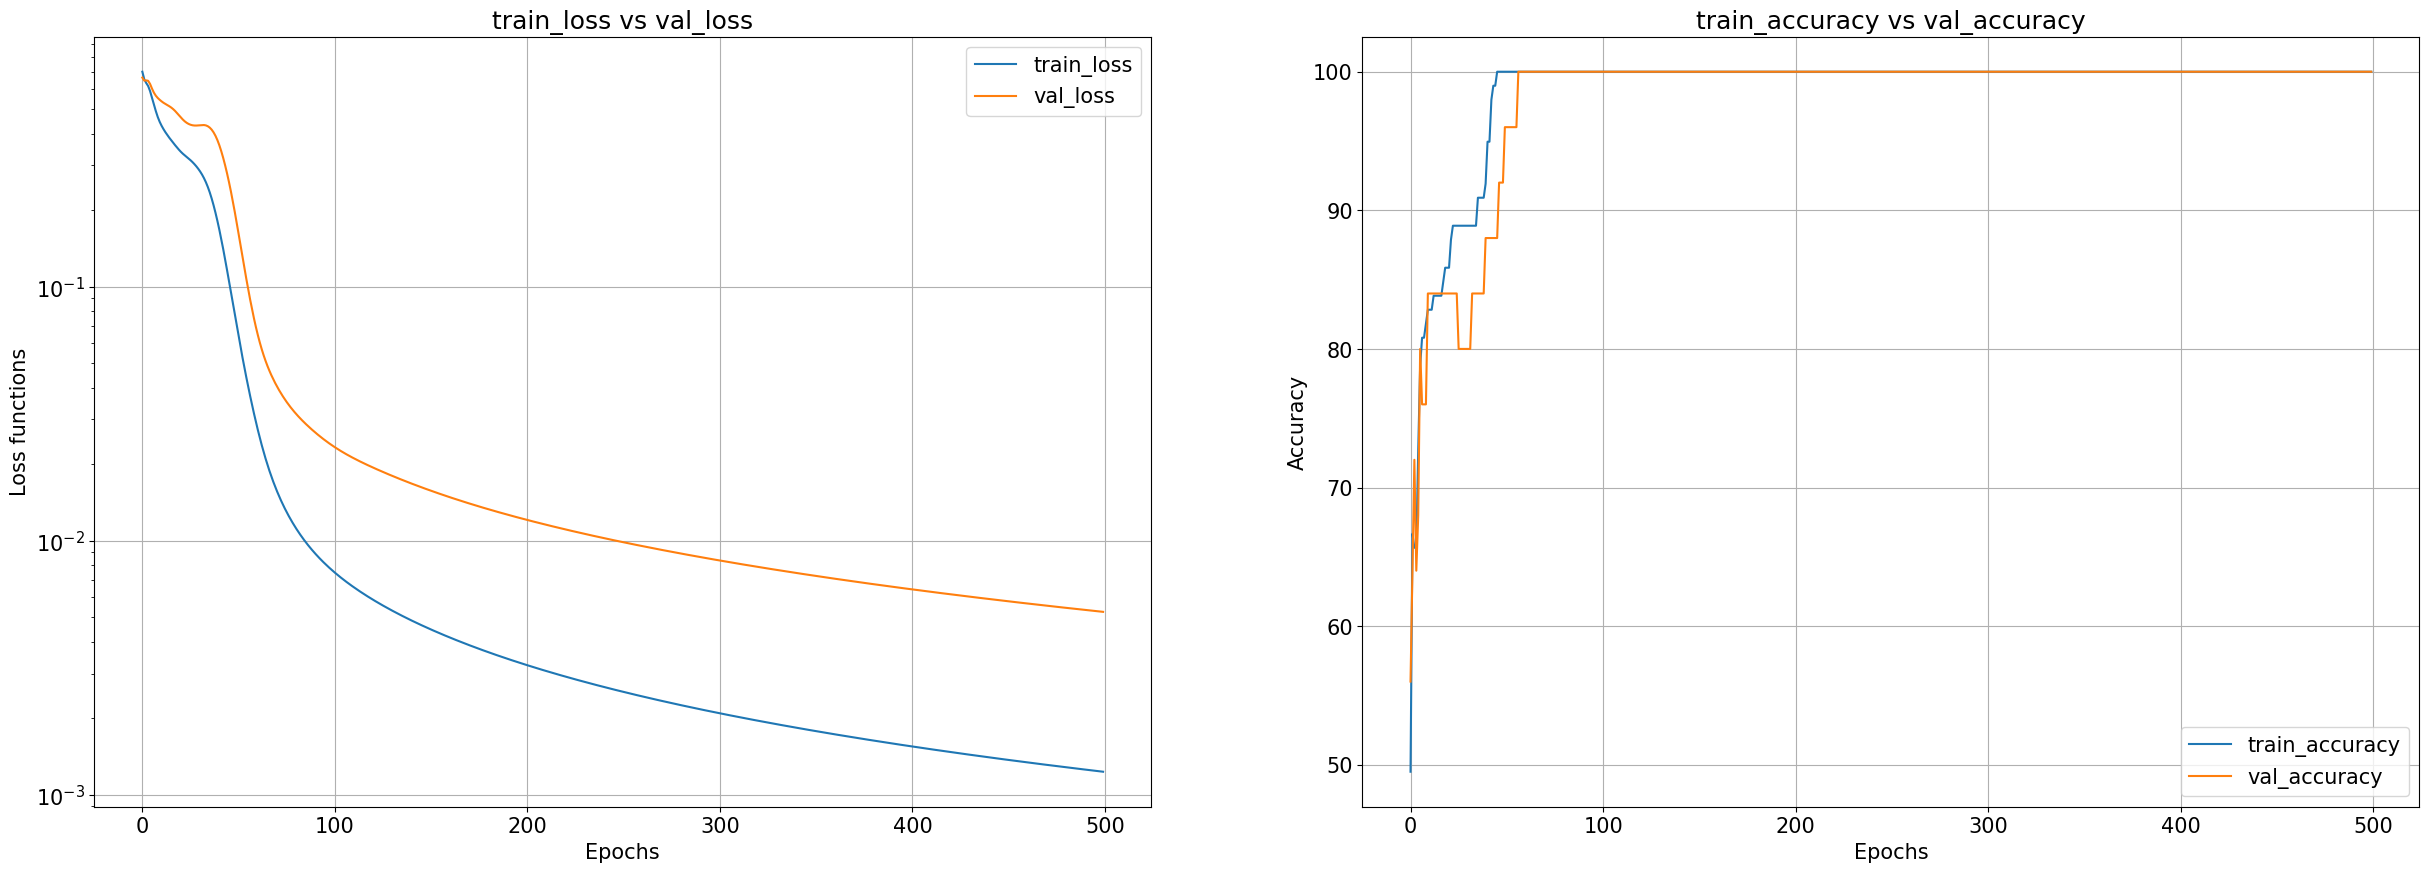

In [ ]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_nest['train_loss'],label='train_loss')
plt.plot(history_nest['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_nest['train_accuracy'],label='train_accuracy')
plt.plot(history_nest['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)


### Comparison

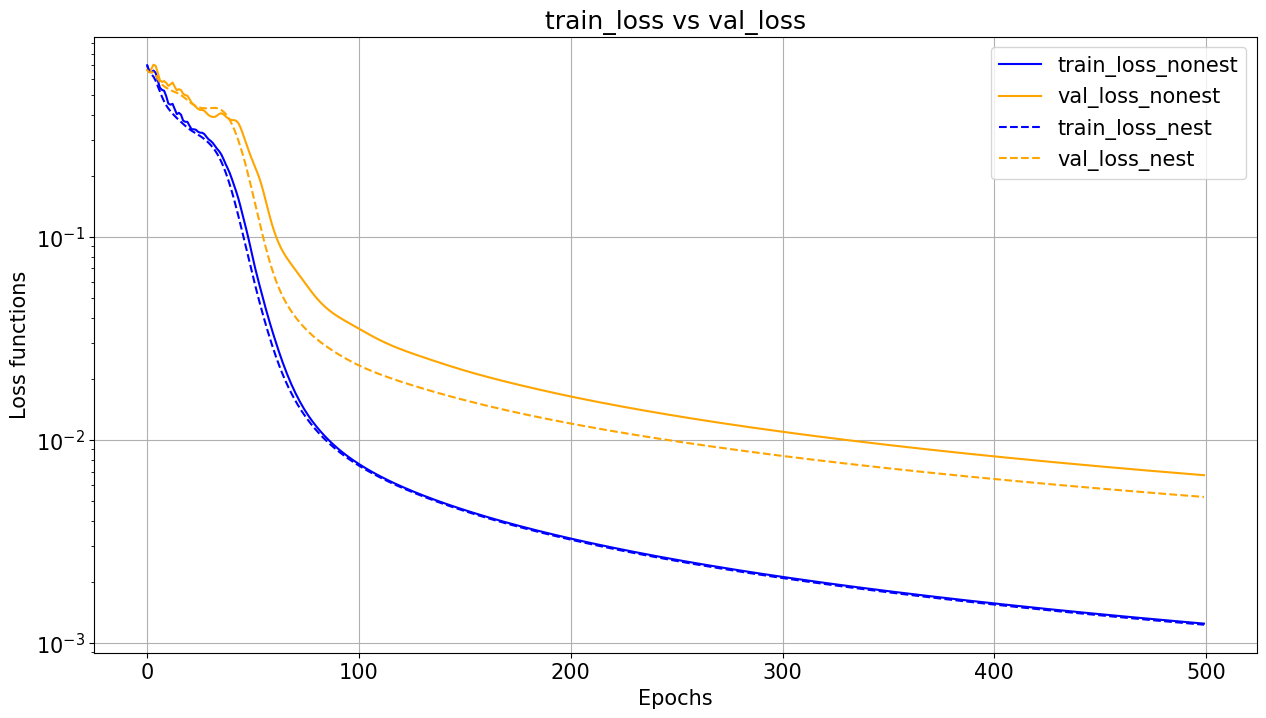

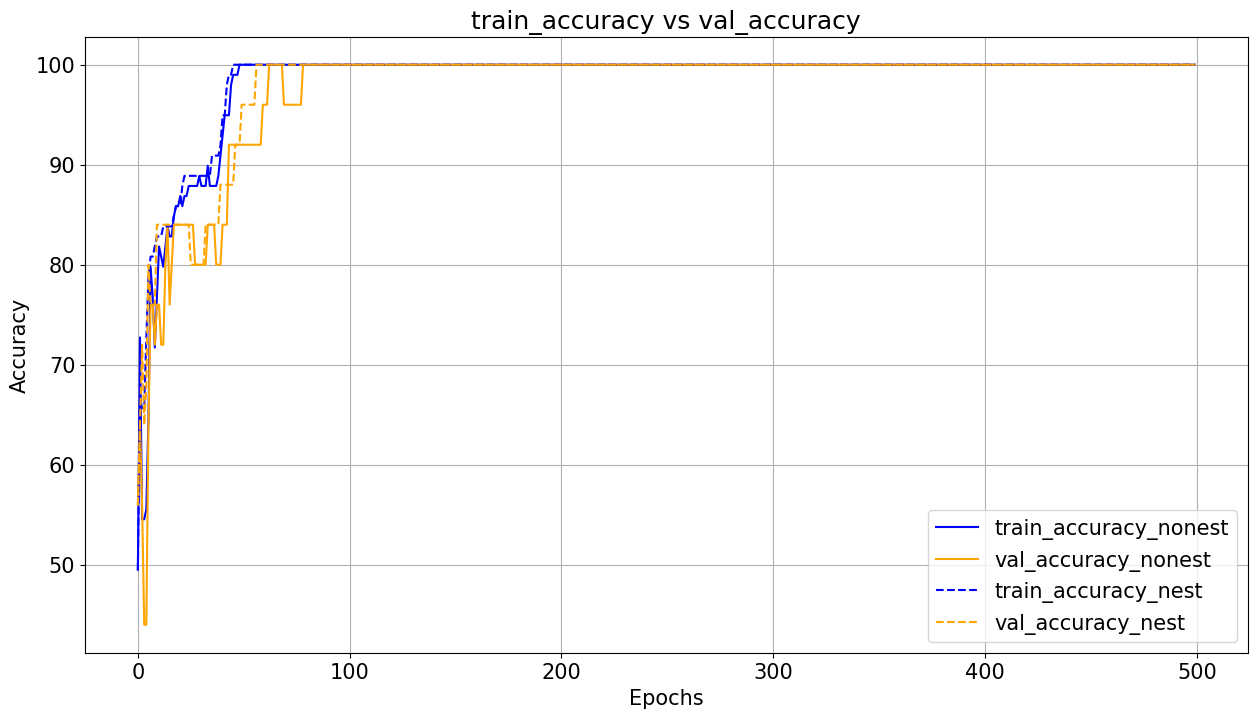

In [ ]:
plt.figure(1,figsize=(15,8))
#plt.subplot(1,2,1)
plt.plot(history_nonest['train_loss'], '-', label='train_loss_nonest', color='blue')
plt.plot(history_nonest['val_loss'], '-', label='val_loss_nonest', color='orange')
plt.plot(history_nest['train_loss'], '--', label='train_loss_nest', color='blue')
plt.plot(history_nest['val_loss'], '--', label='val_loss_nest', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.figure(2,figsize=(15,8))
#plt.subplot(1,2,2)
plt.plot(history_nonest['train_accuracy'], '-',label='train_accuracy_nonest', color='blue')
plt.plot(history_nonest['val_accuracy'], '-', label='val_accuracy_nonest', color='orange')
plt.plot(history_nest['train_accuracy'], '--', label='train_accuracy_nest', color='blue')
plt.plot(history_nest['val_accuracy'], '--', label='val_accuracy_nest', color='orange')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

In [ ]:
params = orig_params.copy()
params['loss'] = 'binary_crossentropy'
params['output_act_func'] = 'sigm'
params['scale_eta_batchsize'] = None
params['dim_hidden'] = params.pop('hidden_dim')
params['n_batch'] = 'batch'
print(params)
seed = np.random.randint(10,1000)
np.random.seed(seed)
params['nest'] = False
history_cv_nonest = cross_validation(X_train_monk, y_train_monk.reshape(1,X_train_monk.shape[1]), folds=5, metrics=[MSE,accuracy], params=params.copy(), callbacks={'early_stopping':None, 'reduce_eta':None})
np.random.seed(seed)
params['nest'] = True
history_cv_nest = cross_validation(X_train_monk, y_train_monk.reshape(1,X_train_monk.shape[1]), 5, [MSE,accuracy], params=params.copy(), callbacks={'early_stopping':None, 'reduce_eta':None})

{'hidden_act_func': 'tanh', 'eta': 0.5, 'lam': 0.0, 'alpha': 0.9, 'n_batch': 'batch', 'use_opt': 0, 'nest': False, 'l1_reg': False, 'epochs': 500, 'loss': 'binary_crossentropy', 'output_act_func': 'sigm', 'scale_eta_batchsize': None, 'dim_hidden': 4}


In [ ]:
history_cv_nonest

{'train_loss_mean': 0.001314719943415968,
 'train_loss_std': 0.0004601962730469109,
 'val_loss_mean': 0.13157475424576204,
 'val_loss_std': 0.16106457131011576,
 'train_MSE_mean': 4.142578958996397e-06,
 'train_MSE_std': 2.471019657535412e-06,
 'val_MSE_mean': 0.0357300570397759,
 'val_MSE_std': 0.044507524492649005,
 'train_accuracy_mean': 100.0,
 'train_accuracy_std': 0.0,
 'val_accuracy_mean': 95.2,
 'val_accuracy_std': 6.3999999999999995}

In [ ]:
history_cv_nest

{'train_loss_mean': 0.0011461912665193755,
 'train_loss_std': 0.0002073788572114114,
 'val_loss_mean': 0.13288179635372416,
 'val_loss_std': 0.16232237104379138,
 'train_MSE_mean': 3.675147976060872e-06,
 'train_MSE_std': 1.7677307969651305e-06,
 'val_MSE_mean': 0.03581706715040193,
 'val_MSE_std': 0.04454216908317018,
 'train_accuracy_mean': 100.0,
 'train_accuracy_std': 0.0,
 'val_accuracy_mean': 95.2,
 'val_accuracy_std': 6.3999999999999995}

## CUP

Define training and model hyperparameters

In [ ]:
orig_params = {'hidden_dim': 50,
        'hidden_act_func': 'tanh',
        'hidden_dim2': 50,
        'hidden_act_func2' : 'tanh',
        'eta': 0.001,
        'lam': 0.000,
        'alpha': 0.9,
        'n_batch': 150,
        'use_opt':0,
        'nest': True,
        'l1_reg' : False,
        'epochs' : 500,
        'loss' : 'MSE',
        'output_act_func': 'lin'
        }
seed = np.random.randint(10,1000)

### Normal momentum

Build model

In [ ]:
params = orig_params.copy()
input_layer = Input(X_train_cup.shape[0])
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
o = 2
while True:
    if f'hidden_dim{o}' in params.keys():
        hidden_layer = Layer(hidden_layer, params.pop(f'hidden_dim{o}'), params.pop(f'hidden_act_func{o}'))
        o += 1
    else: break
output_layer = Layer(hidden_layer, 3, params.pop('output_act_func'))

model = NeuralNetwork(input_layer, output_layer, params.pop('loss'), metrics=[MEE])

init_weights_list = model.get_weights_list()

Training with normal momentum:

In [ ]:
np.random.seed(seed)
params['nest'] = False
history_nonest = model.train(X_train_cup, y_train_cup,
                                    ** params,
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None
                                    )

Epoch 0: train_loss: 6.120e+02, val_loss: 6.688e+02; train_MEE: 3.772e+01, val_MEE: 3.950e+01  lr : 0.001
Epoch 1: train_loss: 3.337e+02, val_loss: 3.693e+02; train_MEE: 2.681e+01, val_MEE: 2.834e+01  lr : 0.001
Epoch 2: train_loss: 1.565e+02, val_loss: 1.696e+02; train_MEE: 1.853e+01, val_MEE: 1.927e+01  lr : 0.001
Epoch 3: train_loss: 7.478e+01, val_loss: 7.605e+01; train_MEE: 1.309e+01, val_MEE: 1.309e+01  lr : 0.001
Epoch 4: train_loss: 5.401e+01, val_loss: 4.969e+01; train_MEE: 1.148e+01, val_MEE: 1.109e+01  lr : 0.001
Epoch 5: train_loss: 3.911e+01, val_loss: 3.769e+01; train_MEE: 9.649e+00, val_MEE: 9.581e+00  lr : 0.001
Epoch 6: train_loss: 3.220e+01, val_loss: 3.042e+01; train_MEE: 8.947e+00, val_MEE: 8.780e+00  lr : 0.001
Epoch 7: train_loss: 2.580e+01, val_loss: 2.389e+01; train_MEE: 7.919e+00, val_MEE: 7.752e+00  lr : 0.001
Epoch 8: train_loss: 2.096e+01, val_loss: 1.994e+01; train_MEE: 7.108e+00, val_MEE: 7.036e+00  lr : 0.001
Epoch 9: train_loss: 1.715e+01, val_loss: 1.65

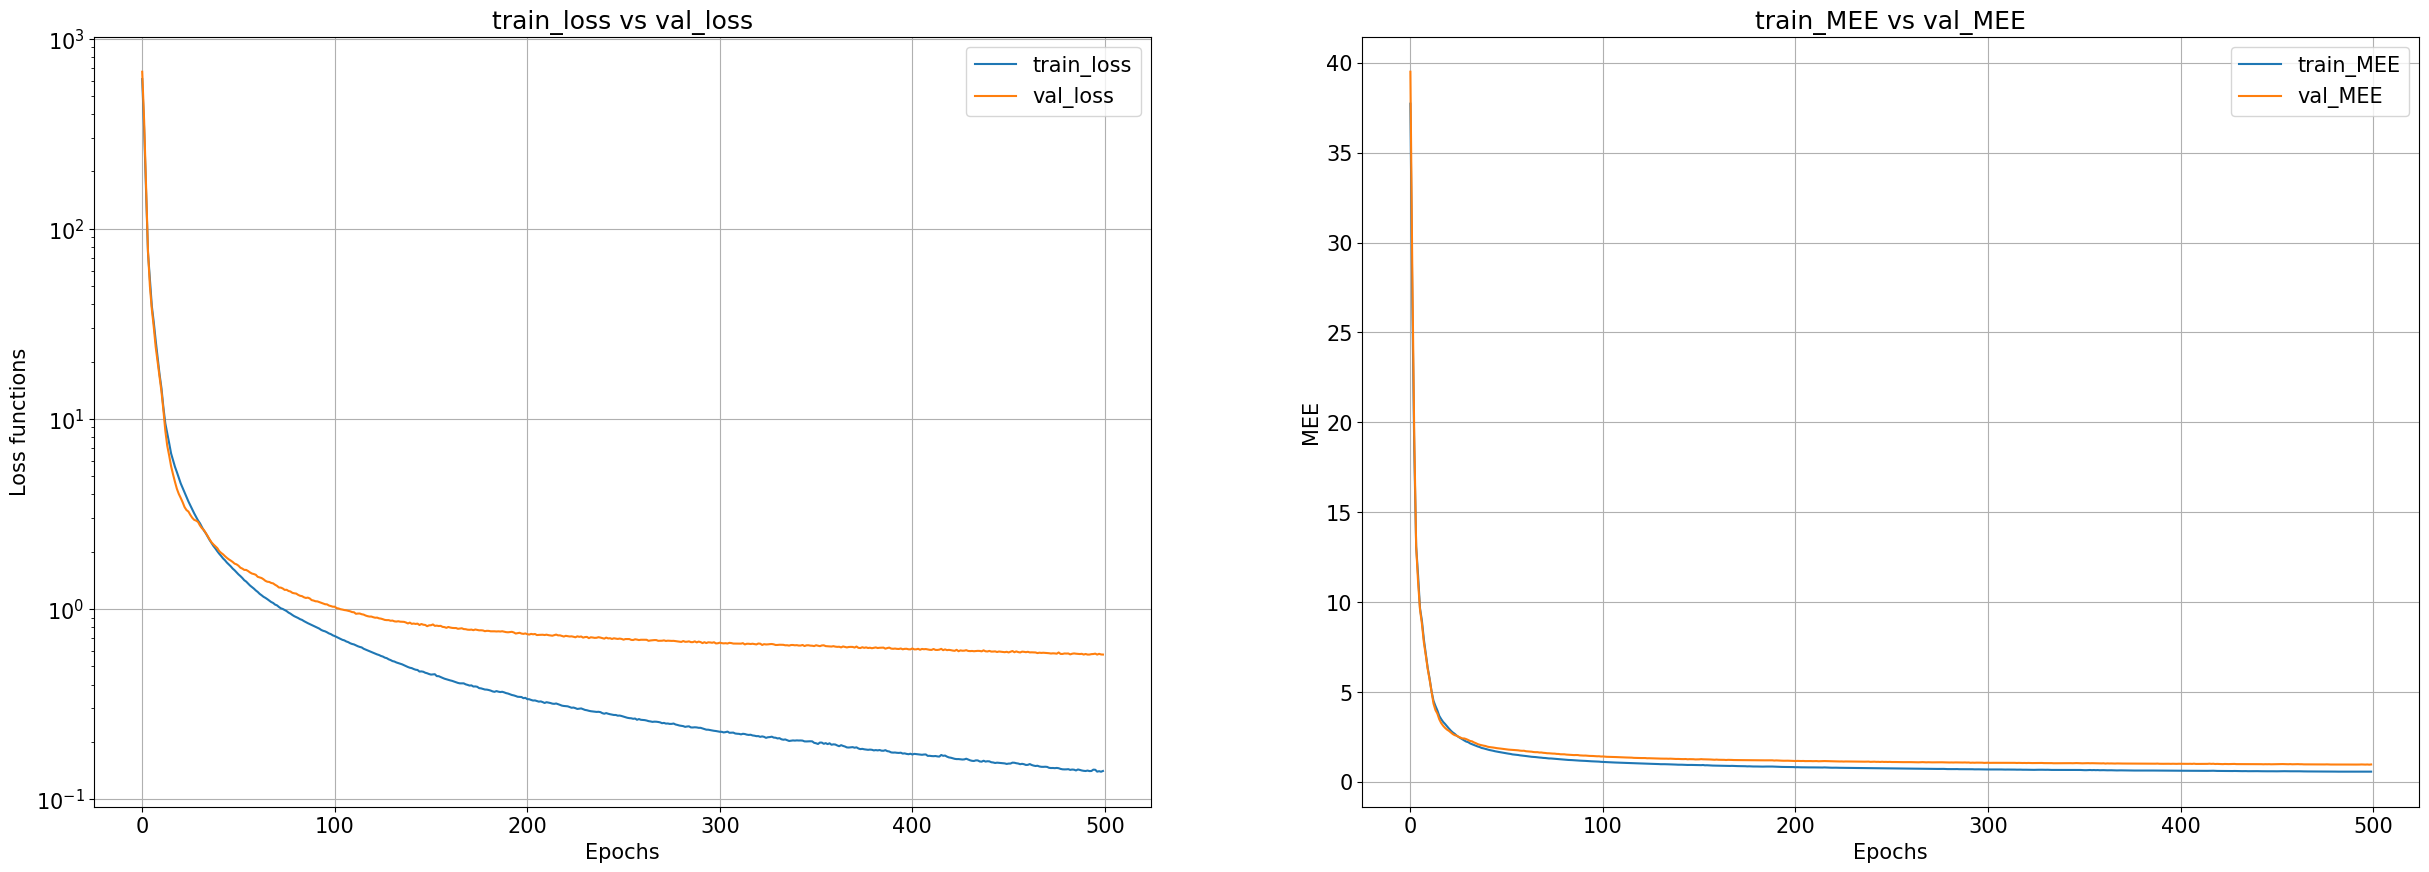

In [ ]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_nonest['train_loss'],label='train_loss')
plt.plot(history_nonest['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_nonest['train_MEE'],label='train_MEE')
plt.plot(history_nonest['val_MEE'], label='val_MEE')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

### Nestorov momentum


Build model


In [ ]:
params = orig_params.copy()
input_layer = Input(X_train_cup.shape[0])
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
o = 2
while True:
    if f'hidden_dim{o}' in params.keys():
        hidden_layer = Layer(hidden_layer, params.pop(f'hidden_dim{o}'), params.pop(f'hidden_act_func{o}'))
        o += 1
    else: break
output_layer = Layer(hidden_layer, 3, params.pop('output_act_func'))

model = NeuralNetwork(input_layer, output_layer, params.pop('loss'), metrics=[MEE])

model.set_initial_weights(init_weights_list)

Training with L1 regularization:


In [ ]:
np.random.seed(seed)
params['nest'] = True
history_nest = model.train(X_train_cup, y_train_cup,
                                    ** params,
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None
                                    )

Epoch 0: train_loss: 6.121e+02, val_loss: 6.688e+02; train_MEE: 3.774e+01, val_MEE: 3.951e+01  lr : 0.001
Epoch 1: train_loss: 3.267e+02, val_loss: 3.612e+02; train_MEE: 2.649e+01, val_MEE: 2.797e+01  lr : 0.001
Epoch 2: train_loss: 1.472e+02, val_loss: 1.603e+02; train_MEE: 1.761e+01, val_MEE: 1.835e+01  lr : 0.001
Epoch 3: train_loss: 6.819e+01, val_loss: 6.972e+01; train_MEE: 1.225e+01, val_MEE: 1.224e+01  lr : 0.001
Epoch 4: train_loss: 4.594e+01, val_loss: 4.229e+01; train_MEE: 1.042e+01, val_MEE: 1.008e+01  lr : 0.001
Epoch 5: train_loss: 3.245e+01, val_loss: 3.023e+01; train_MEE: 8.812e+00, val_MEE: 8.610e+00  lr : 0.001
Epoch 6: train_loss: 2.513e+01, val_loss: 2.350e+01; train_MEE: 7.776e+00, val_MEE: 7.594e+00  lr : 0.001
Epoch 7: train_loss: 2.000e+01, val_loss: 1.877e+01; train_MEE: 6.842e+00, val_MEE: 6.709e+00  lr : 0.001
Epoch 8: train_loss: 1.598e+01, val_loss: 1.551e+01; train_MEE: 6.033e+00, val_MEE: 5.971e+00  lr : 0.001
Epoch 9: train_loss: 1.319e+01, val_loss: 1.30

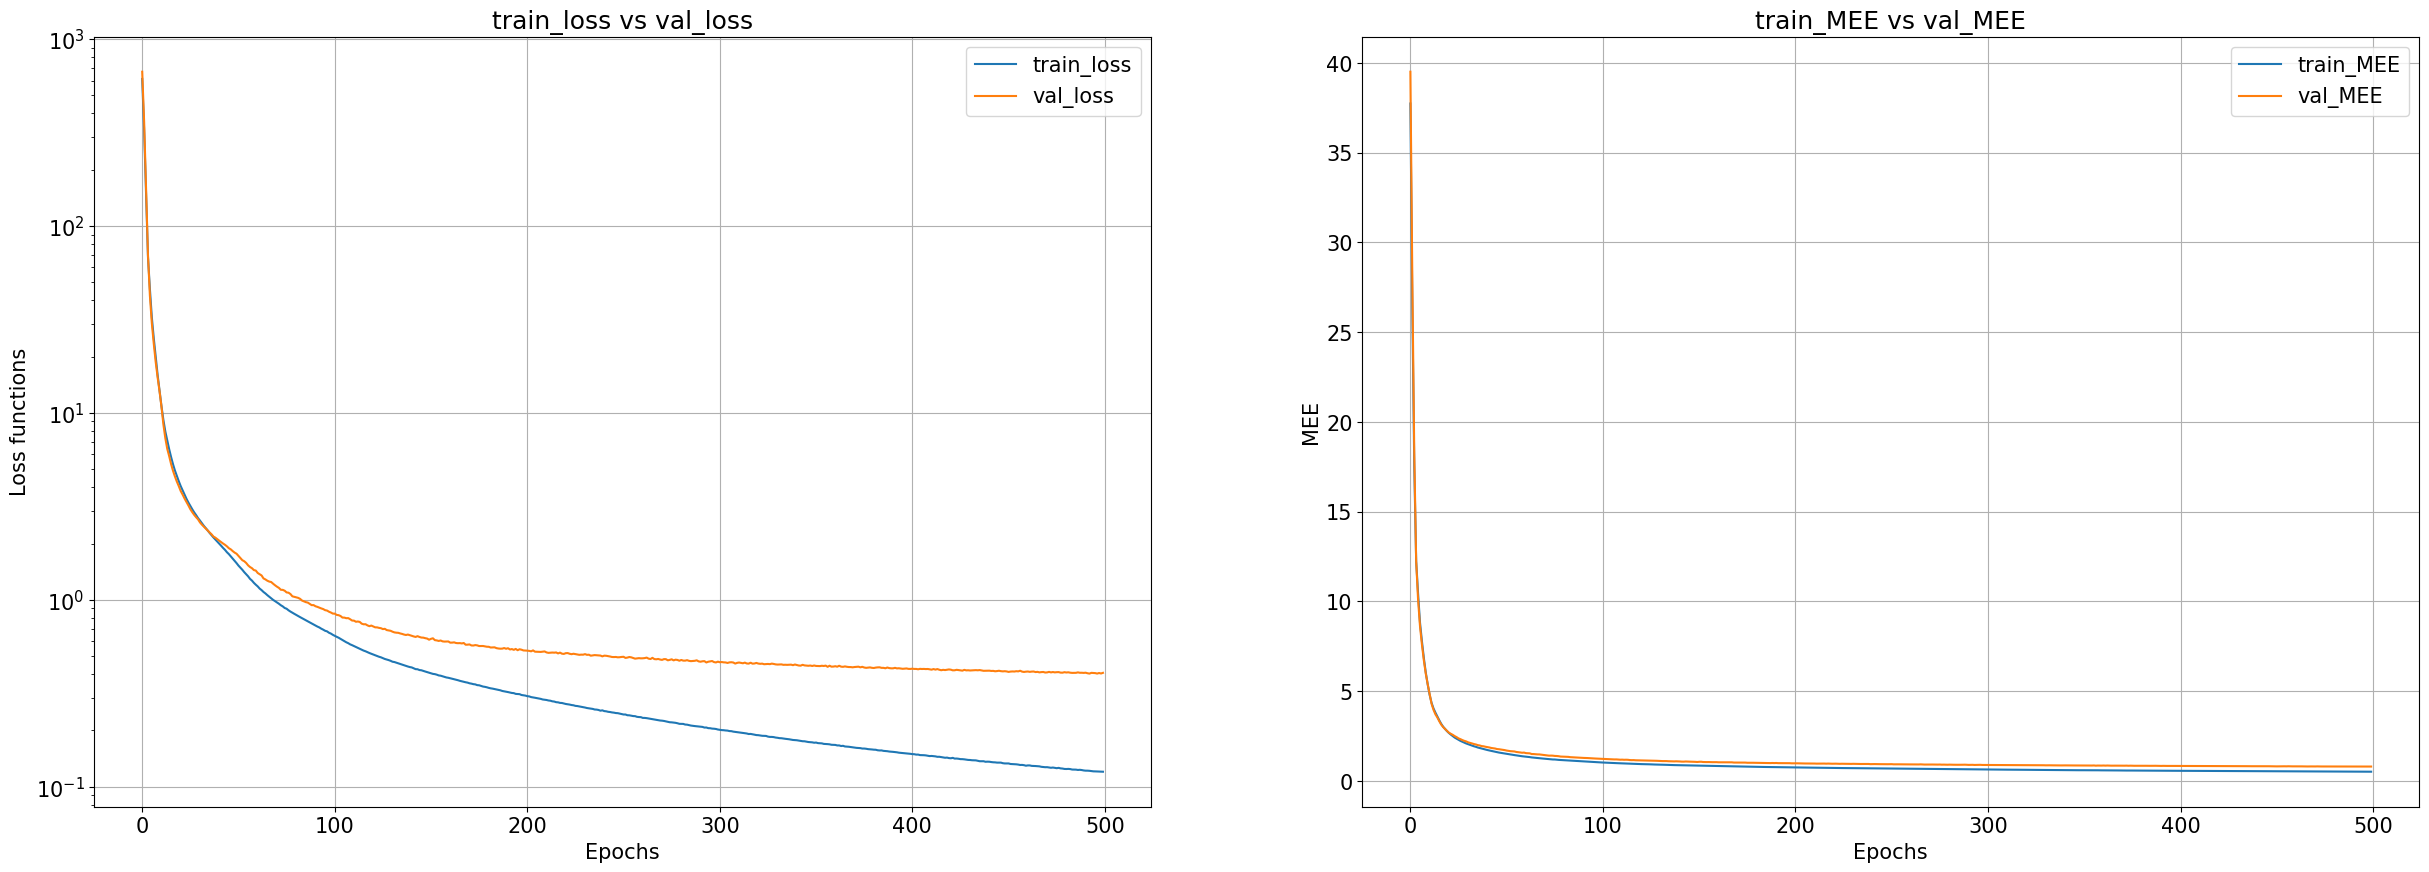

In [ ]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_nest['train_loss'],label='train_loss')
plt.plot(history_nest['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_nest['train_MEE'],label='train_MEE')
plt.plot(history_nest['val_MEE'], label='val_MEE')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)


### Comparison

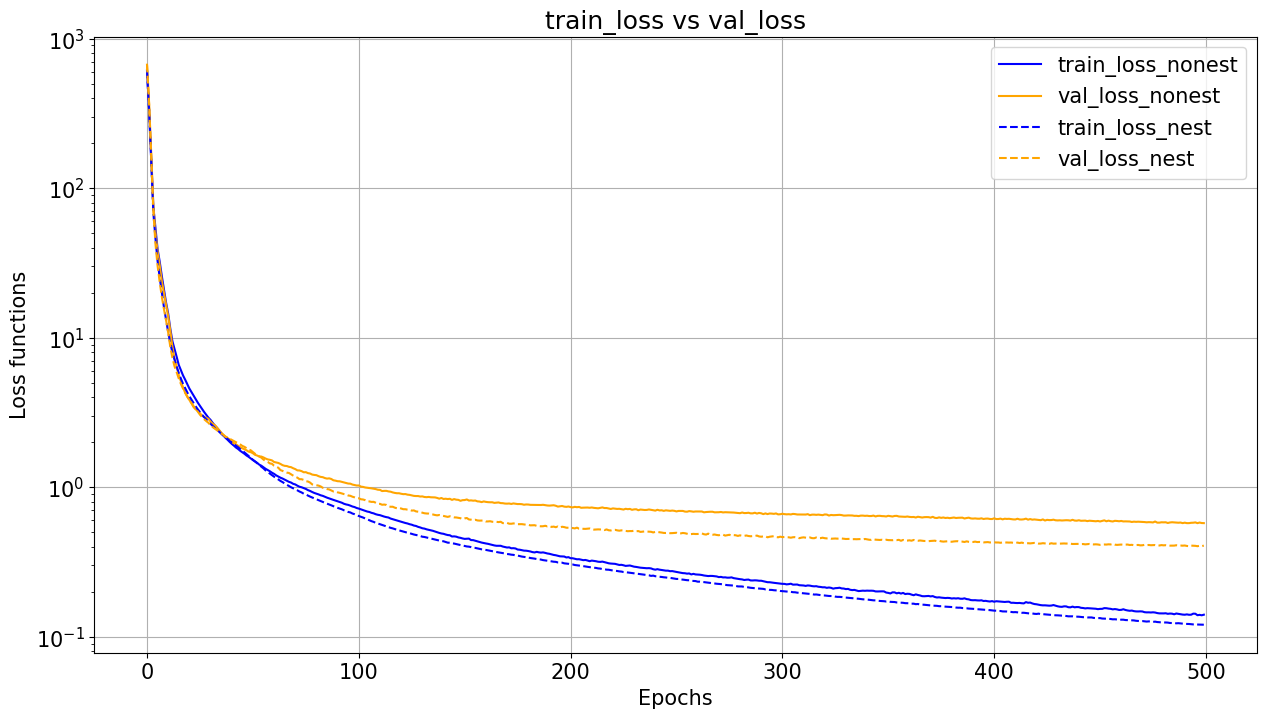

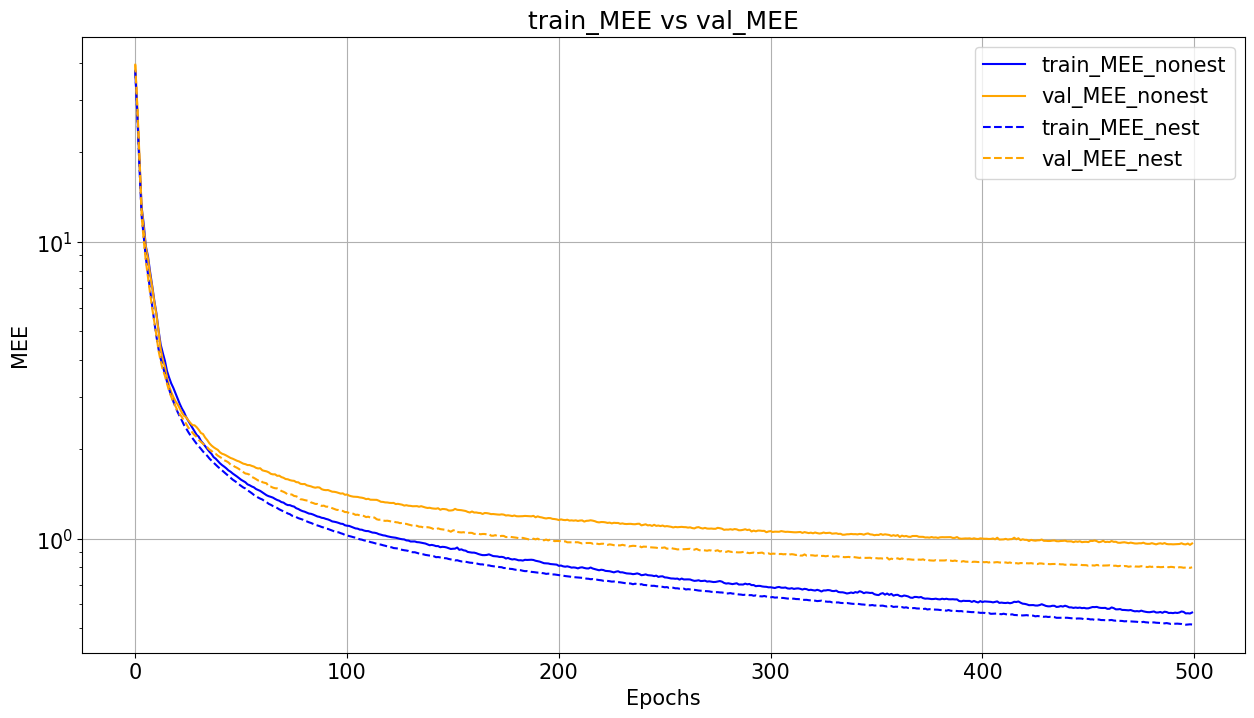

In [ ]:
plt.figure(1,figsize=(15,8))
#plt.subplot(1,2,1)
plt.plot(history_nonest['train_loss'], '-', label='train_loss_nonest', color='blue')
plt.plot(history_nonest['val_loss'], '-', label='val_loss_nonest', color='orange')
plt.plot(history_nest['train_loss'], '--', label='train_loss_nest', color='blue')
plt.plot(history_nest['val_loss'], '--', label='val_loss_nest', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.figure(2,figsize=(15,8))
#plt.subplot(1,2,2)
plt.plot(history_nonest['train_MEE'], '-',label='train_MEE_nonest', color='blue')
plt.plot(history_nonest['val_MEE'], '-', label='val_MEE_nonest', color='orange')
plt.plot(history_nest['train_MEE'], '--', label='train_MEE_nest', color='blue')
plt.plot(history_nest['val_MEE'], '--', label='val_MEE_nest', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

In [13]:
orig_params = {'hidden_dim': 50,
        'hidden_act_func': 'tanh',
        'hidden_dim2': 50,
        'hidden_act_func2' : 'tanh',
        'eta': 0.001,
        'lam': 0.000,
        'alpha': 0.9,
        'n_batch': 150,
        'use_opt':0,
        'nest': True,
        'l1_reg' : False,
        'epochs' : 500,
        'loss' : 'MSE',
        'output_act_func': 'lin'
        }


In [14]:
params = orig_params.copy()
params['loss'] = 'MSE'
params['output_act_func'] = 'lin'
params['scale_eta_batchsize'] = None
params['dim_hidden'] = params.pop('hidden_dim')
params['dim_hidden2'] = params.pop('hidden_dim2')
params['n_batch'] = 'batch'
print(params)
seed = np.random.randint(10,1000)
np.random.seed(seed)
params['nest'] = False
history_cv_nonest = cross_validation(X_train_cup, y_train_cup, folds=5, metrics=[MSE,MEE], params=params.copy(), callbacks={'early_stopping':None, 'reduce_eta':None})
np.random.seed(seed)
params['nest'] = True
history_cv_nest = cross_validation(X_train_cup, y_train_cup, 5, [MSE,MEE], params=params.copy(), callbacks={'early_stopping':None, 'reduce_eta':None})

{'hidden_act_func': 'tanh', 'hidden_act_func2': 'tanh', 'eta': 0.001, 'lam': 0.0, 'alpha': 0.9, 'n_batch': 'batch', 'use_opt': 0, 'nest': True, 'l1_reg': False, 'epochs': 500, 'loss': 'MSE', 'output_act_func': 'lin', 'scale_eta_batchsize': None, 'dim_hidden': 50, 'dim_hidden2': 50}


In [15]:
history_cv_nonest

{'train_loss_mean': 0.48576163946064066,
 'train_loss_std': 0.06899827449674666,
 'val_loss_mean': 1.0298704061768587,
 'val_loss_std': 0.19192093018999407,
 'train_MSE_mean': 0.48576163946064066,
 'train_MSE_std': 0.06899827449674666,
 'val_MSE_mean': 1.0298704061768587,
 'val_MSE_std': 0.19192093018999407,
 'train_MEE_mean': 0.9693396828536415,
 'train_MEE_std': 0.0425644672697882,
 'val_MEE_mean': 1.325915727833794,
 'val_MEE_std': 0.07477476826040913}

In [16]:
history_cv_nest

{'train_loss_mean': 0.43407576661565805,
 'train_loss_std': 0.10606201138821017,
 'val_loss_mean': 0.7584897207065159,
 'val_loss_std': 0.1892612979359239,
 'train_MSE_mean': 0.43407576661565805,
 'train_MSE_std': 0.10606201138821017,
 'val_MSE_mean': 0.7584897207065159,
 'val_MSE_std': 0.1892612979359239,
 'train_MEE_mean': 0.9070642798372214,
 'train_MEE_std': 0.05413106487866418,
 'val_MEE_mean': 1.1915373247276362,
 'val_MEE_std': 0.12172597340554502}